# Amyotrophic Lateral Sclerosis (ALS) Case-Study Cluster analysis:
Project Clustering - Using (Kmeans to be specific)

Use the ALS dataset. This case-study examines the patterns, symmetries, associations and causality in a rare but devastating disease, amyotrophic lateral sclerosis (ALS). A major clinically relevant question in this biomedical study is: What patient phenotypes can be automatically and reliably identified and used to predict the change of the ALSFRS slope over time?. This problem aims to explore the data set by unsupervised learning (you only need to work on K mean in this assignment).


In [1]:
import pandas as pd
df = pd.read_csv("ALS_TrainingData_2223.csv")
del df["ID"]
del df["SubjectID"]
df.shape

(2223, 99)

In [2]:
df.head()

Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range   
0        65         57.0            40.5         38.0       0.066202  \
1        48         45.0            41.0         39.0       0.010453   
2        38         50.0            47.0         45.0       0.008929   
3        63         47.0            44.0         41.0       0.012111   
4        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min   
0     -0.965608                30                 28.0                22  \
1     -0.921717                37                 33.0                21   
2     -0.914787                24                 14.0                10   
3     -0.598361                30                 29.0                24   
4     -0.444039                32                 27.5                20   

   ALSFRS_Total_range  ...  Sodium_median  Sodium_min  Sodium_range   
0            0.021164  ...          145.5       143.0      0.017422  \
1            0.028725  ...          138.0       136.0      0.010453   
2            0.025000  ...          143.0       140.0      0.008929   
3            0.014963  ...          139.0       138.0      0.012469   
4            0.020374  ...          140.0       138.0      0.008292   

   trunk_max  trunk_median  trunk_min  trunk_range  Urine.Ph_max   
0          8           7.0          7     0.002646           6.0  \
1          8           7.0          5     0.005386           7.0   
2          5           0.0          0     0.008929           6.0   
3          5           5.0          3     0.004988           7.0   
4          6           4.0          1     0.008489           6.0   

   Urine.Ph_median  Urine.Ph_min  
0              6.0           6.0  
1              5.0           5.0  
2              5.0           5.0  
3              6.0           5.0  
4              5.0           5.0  

[5 rows x 99 columns]

In [3]:
### K- MEANS

# Import Libraries
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
df = pd.read_csv('ALS_TestingData_78.csv')
df.head()
del df['ID'] # Remove column named 'ID'
df.head()


Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range   
0  65.906849         46.0            44.0           43       0.024590  \
1  54.000000         39.0            36.0           33       0.013100   
2  56.394521         46.0            43.0           39       0.009736   
3  72.619178         50.0            42.5           41       0.092784   
4  65.000000         45.0            42.0           36       0.021327   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min   
0     -1.767329                33                  5.0                 2  \
1     -1.351852                32                 23.0                14   
2     -0.412429                15                 10.0                 2   
3     -0.383403                34                 24.0                21   
4      0.000000                37                 37.0                37   

   ALSFRS_Total_range  ...  trunk_min  trunk_range  Urine.Ph_max   
0            0.028519  ...          0     0.006440           6.5  \
1            0.039301  ...          0     0.013100           6.5   
2            0.017173  ...          0     0.000000           7.5   
3            0.033592  ...          5     0.007752           7.5   
4            0.000000  ...          7     0.000000           6.0   

   Urine.Ph_median  Urine.Ph_min  Urine.Ph_range  White.Blood.Cell..WBC._max   
0             6.00           6.0        0.004098                        8.57  \
1             5.50           5.0        0.003275                        8.04   
2             6.75           6.0        0.003456                        8.90   
3             7.00           6.0        0.024194                       12.38   
4             5.50           5.0        0.002370                       11.53   

   White.Blood.Cell..WBC._median  White.Blood.Cell..WBC._min   
0                          7.680                        6.60  \
1                          6.620                        4.97   
2                          7.160                        5.01   
3                          7.905                        4.96   
4                          9.290                        7.94   

   White.Blood.Cell..WBC._range  
0                      0.016148  
1                      0.006703  
2                      0.005410  
3                      0.076495  
4                      0.008507  

[5 rows x 130 columns]

c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ben\AppData\Local\Temp\ipykernel_11604\2547754658.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 130 entries, Age_mean to White.Blood.Cell..WBC._range
dtypes: float64(92), int64(38)
memory usage: 79.3 KB


c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.

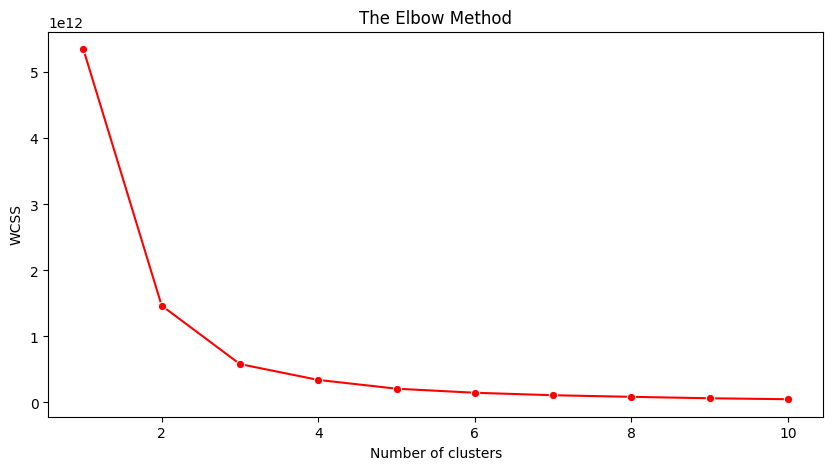

In [4]:

# We can use pandas_profiling for more detailed report
import pandas_profiling
pandas_profiling.ProfileReport(df)

df.info()
df.describe()
df.isnull().sum()
df.drop_duplicates(inplace=True)
# using attributes for visualisation
X = df.iloc[:].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


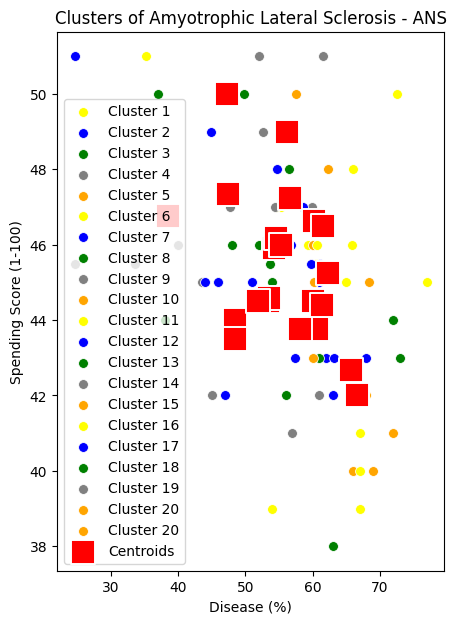

In [5]:

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 22, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(5,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], color = 'yellow', label = 'Cluster 6',s=50)
sns.scatterplot(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], color = 'blue', label = 'Cluster 7',s=50)
sns.scatterplot(x=X[y_kmeans == 7, 0], y=X[y_kmeans == 7, 1], color = 'green', label = 'Cluster 8',s=50)
sns.scatterplot(x=X[y_kmeans == 8, 0], y=X[y_kmeans == 8, 1], color = 'grey', label = 'Cluster 9',s=50)
sns.scatterplot(x=X[y_kmeans == 9, 0], y=X[y_kmeans == 9, 1], color = 'orange', label = 'Cluster 10',s=50)
sns.scatterplot(x=X[y_kmeans == 10, 0], y=X[y_kmeans == 10, 1], color = 'yellow', label = 'Cluster 11',s=50)
sns.scatterplot(x=X[y_kmeans == 11, 0], y=X[y_kmeans == 11, 1], color = 'blue', label = 'Cluster 12',s=50)
sns.scatterplot(x=X[y_kmeans == 12, 0], y=X[y_kmeans == 12, 1], color = 'green', label = 'Cluster 13',s=50)
sns.scatterplot(x=X[y_kmeans == 13, 0], y=X[y_kmeans == 13, 1], color = 'grey', label = 'Cluster 14',s=50)
sns.scatterplot(x=X[y_kmeans == 14, 0], y=X[y_kmeans == 14, 1], color = 'orange', label = 'Cluster 15',s=50)
sns.scatterplot(x=X[y_kmeans == 15, 0], y=X[y_kmeans == 15, 1], color = 'yellow', label = 'Cluster 16',s=50)
sns.scatterplot(x=X[y_kmeans == 16, 0], y=X[y_kmeans == 16, 1], color = 'blue', label = 'Cluster 17',s=50)
sns.scatterplot(x=X[y_kmeans == 17, 0], y=X[y_kmeans == 17, 1], color = 'green', label = 'Cluster 18',s=50)
sns.scatterplot(x=X[y_kmeans == 18, 0], y=X[y_kmeans == 18, 1], color = 'grey', label = 'Cluster 19',s=50)
sns.scatterplot(x=X[y_kmeans == 19, 0], y=X[y_kmeans == 19, 1], color = 'orange', label = 'Cluster 20',s=50)


sns.scatterplot(x=X[y_kmeans == 19, 0], y=X[y_kmeans == 19, 1], color='orange', label='Cluster 20', s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red',
                label='Centroids', s=300, marker=',')
plt.grid(False)
plt.title('Clusters of Amyotrophic Lateral Sclerosis - ANS')
plt.xlabel('Disease (%)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.

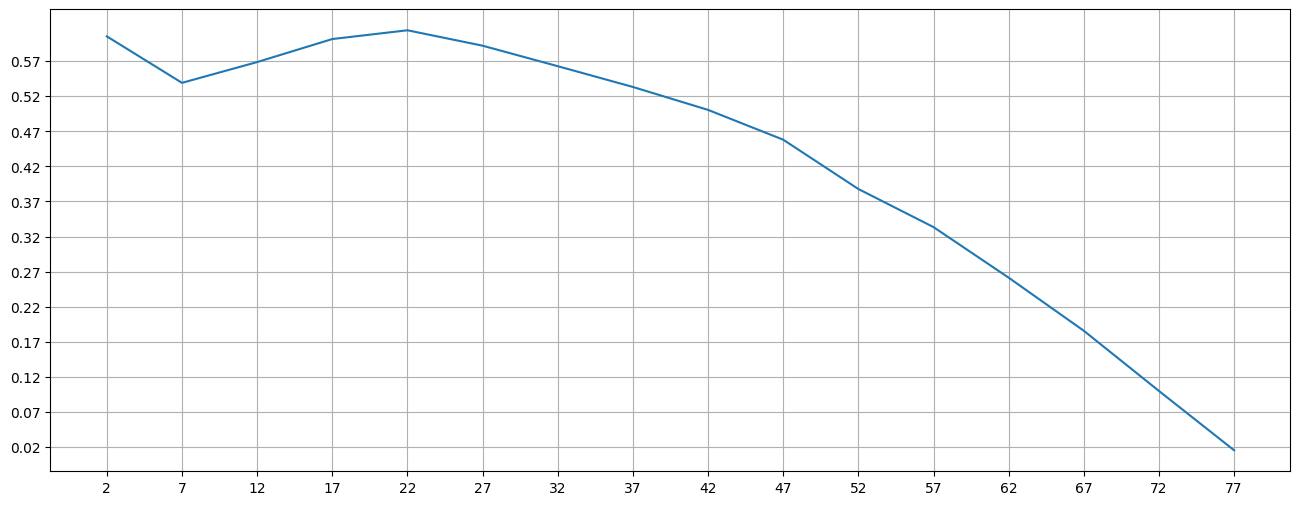

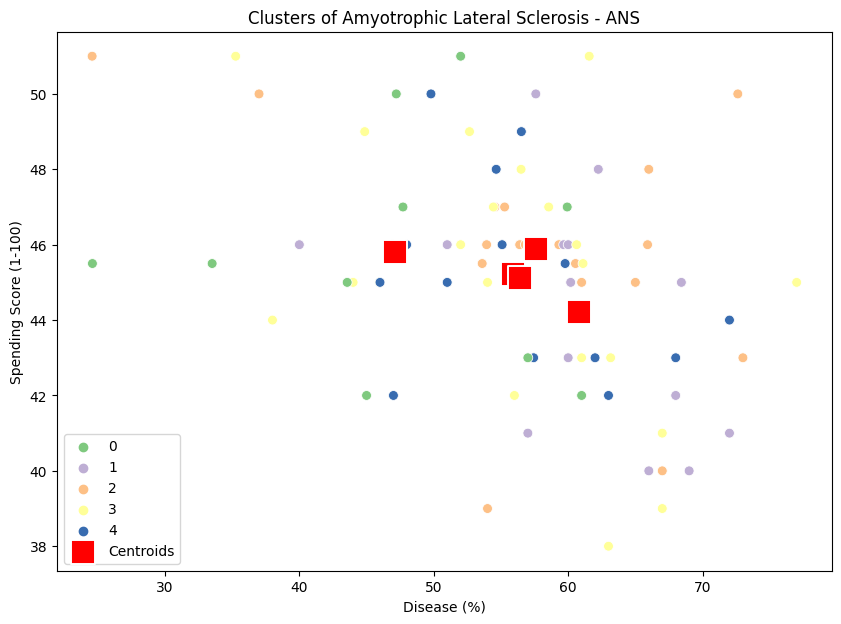

In [6]:

# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)
# Define function to calculate the clustering errors
def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg
# Calculate error values for all k values we're interested in
errors_per_k = [clustering_errors(k, X) for k in possible_k_values]
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)
# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

# Create an instance of KMeans to find 5 clusters
kmeans_4 = KMeans(n_clusters=5)
# Use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions_4, palette='Accent', s=50)
sns.scatterplot(x=kmeans_4.cluster_centers_[:, 0], y=kmeans_4.cluster_centers_[:, 1], color='red',
                label='Centroids', s=300, marker=',')
plt.title('Clusters of Amyotrophic Lateral Sclerosis - ANS')
plt.xlabel('Disease (%)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



In [7]:

import numpy as np
from numpy.linalg import norm

class Kmeans:
    '''Implementing Kmeans algorithm.'''
    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)


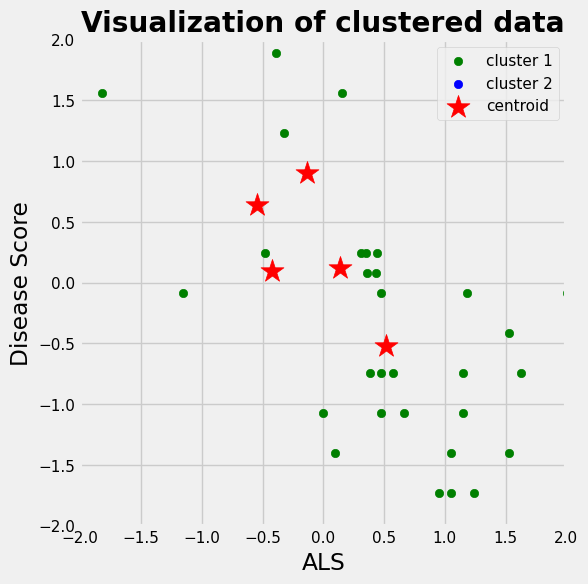

In [8]:

# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = Kmeans(n_clusters=5, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('ALS')
plt.ylabel('Disease Score')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');


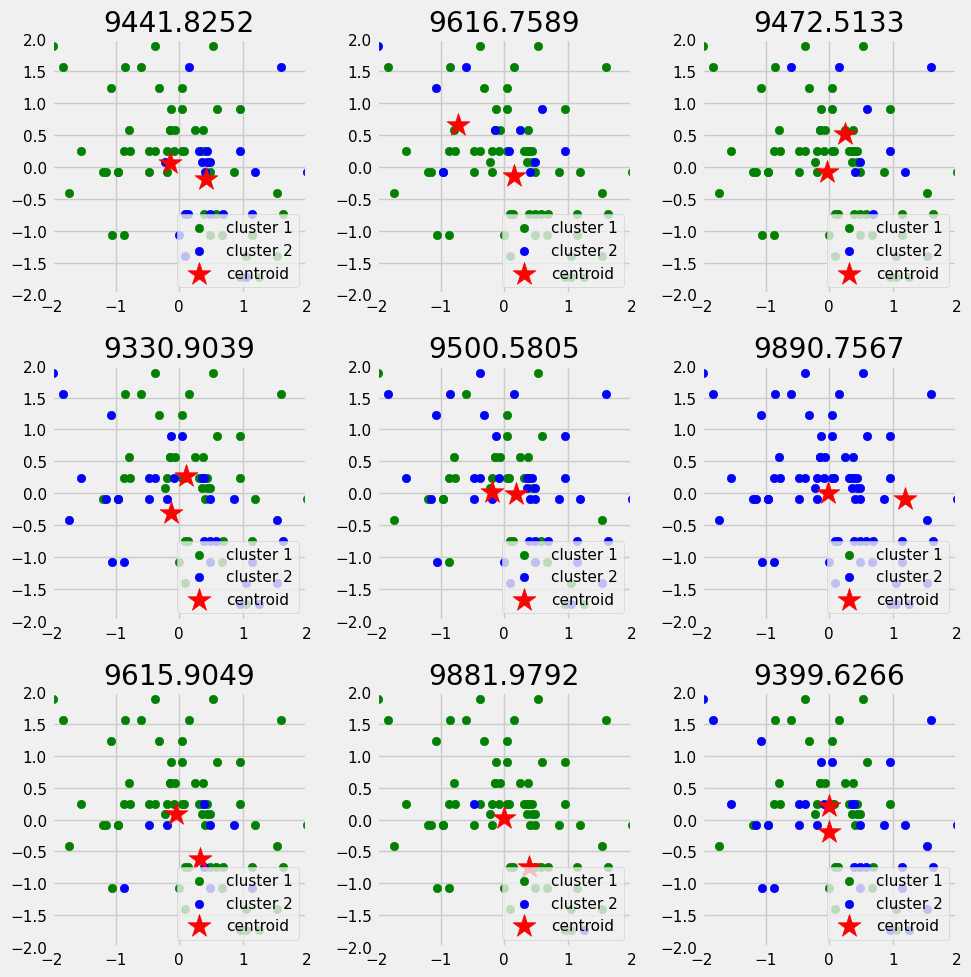

In [9]:

# Randomly Consequences
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = Kmeans(n_clusters=2,
                max_iter=3,
                random_state=np.random.randint(0, 1000, size=1))
    km.fit(X_std)
    centroids = km.centroids
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();


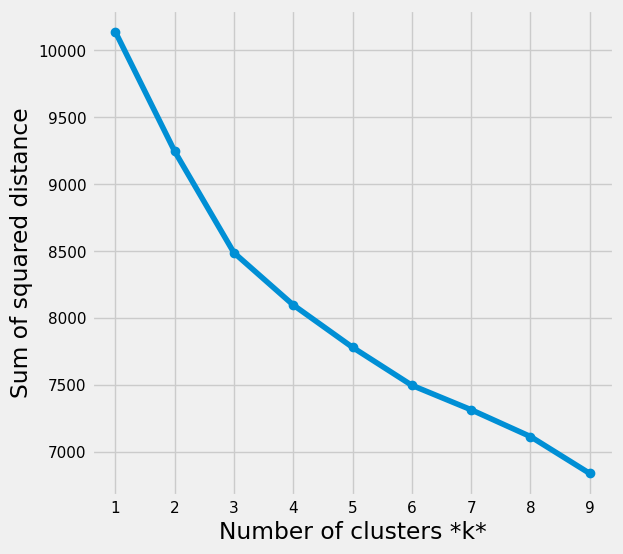

In [10]:

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


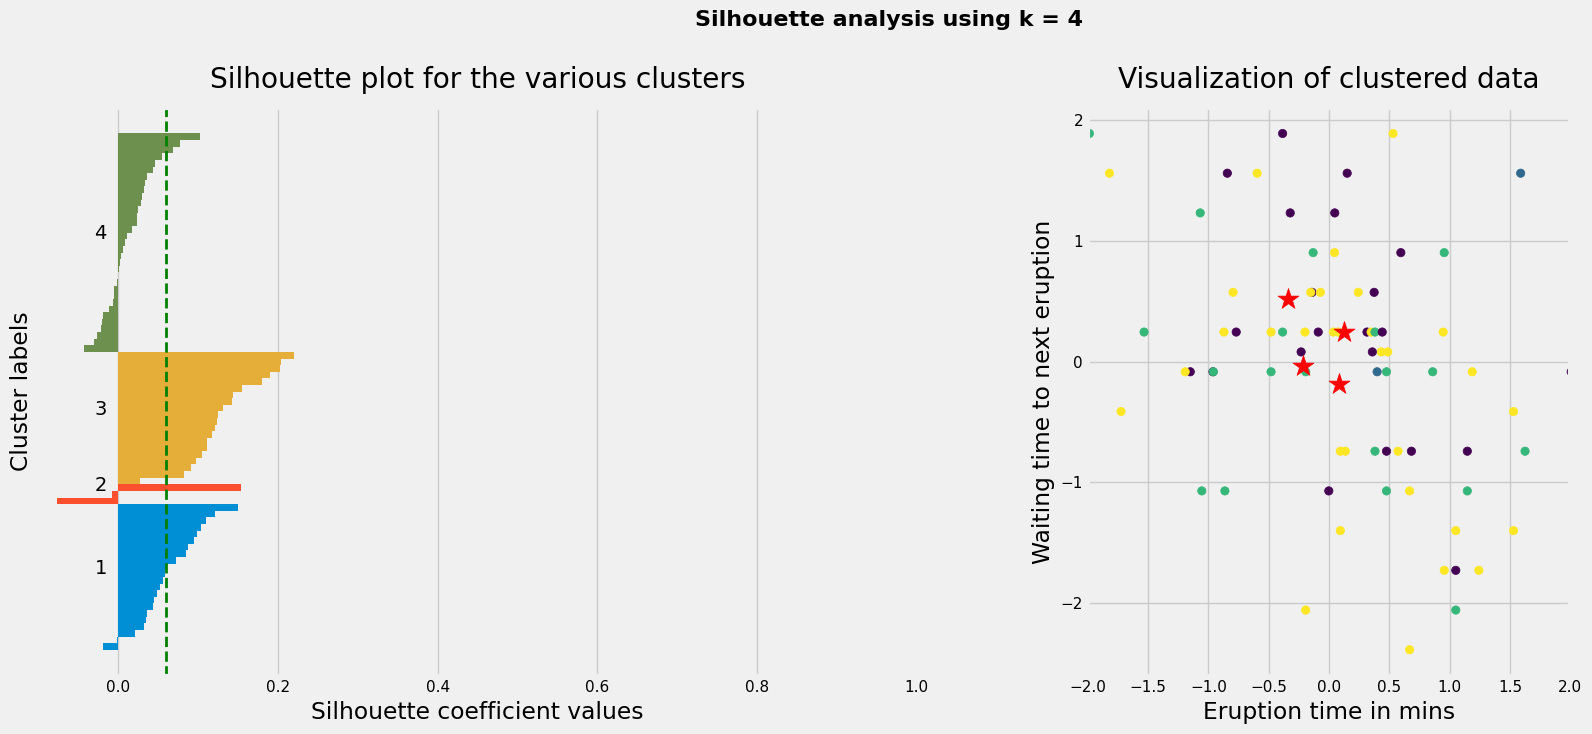

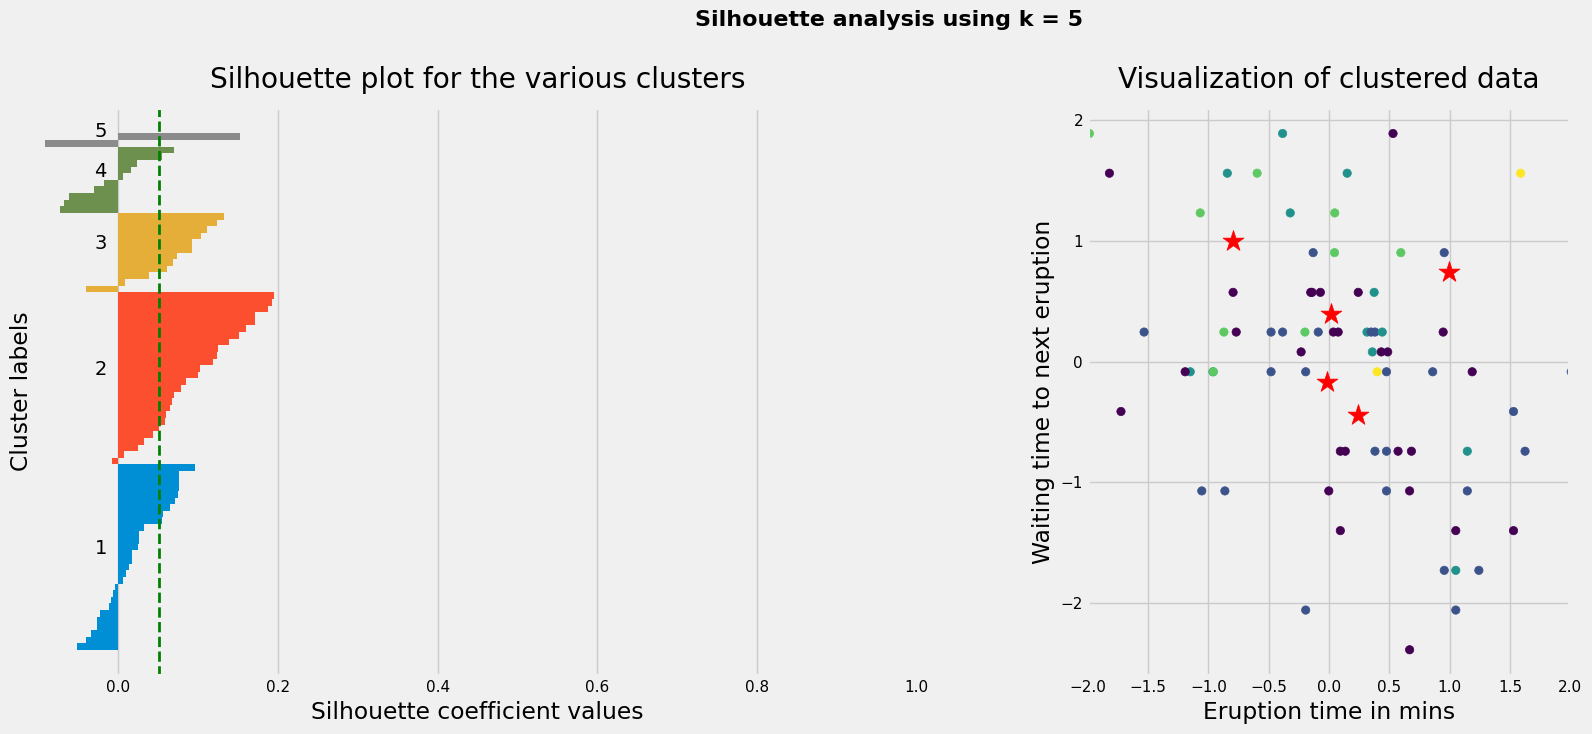

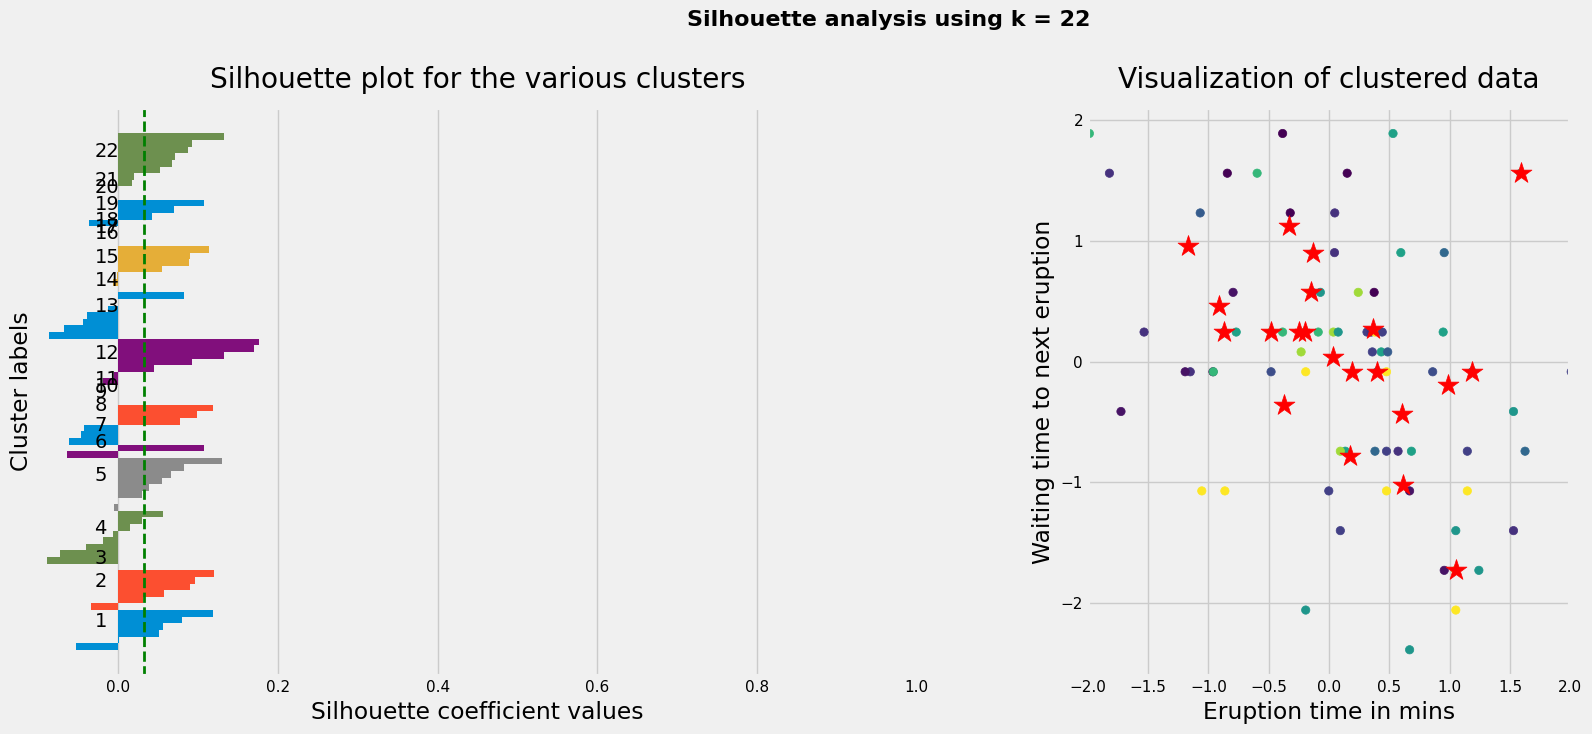

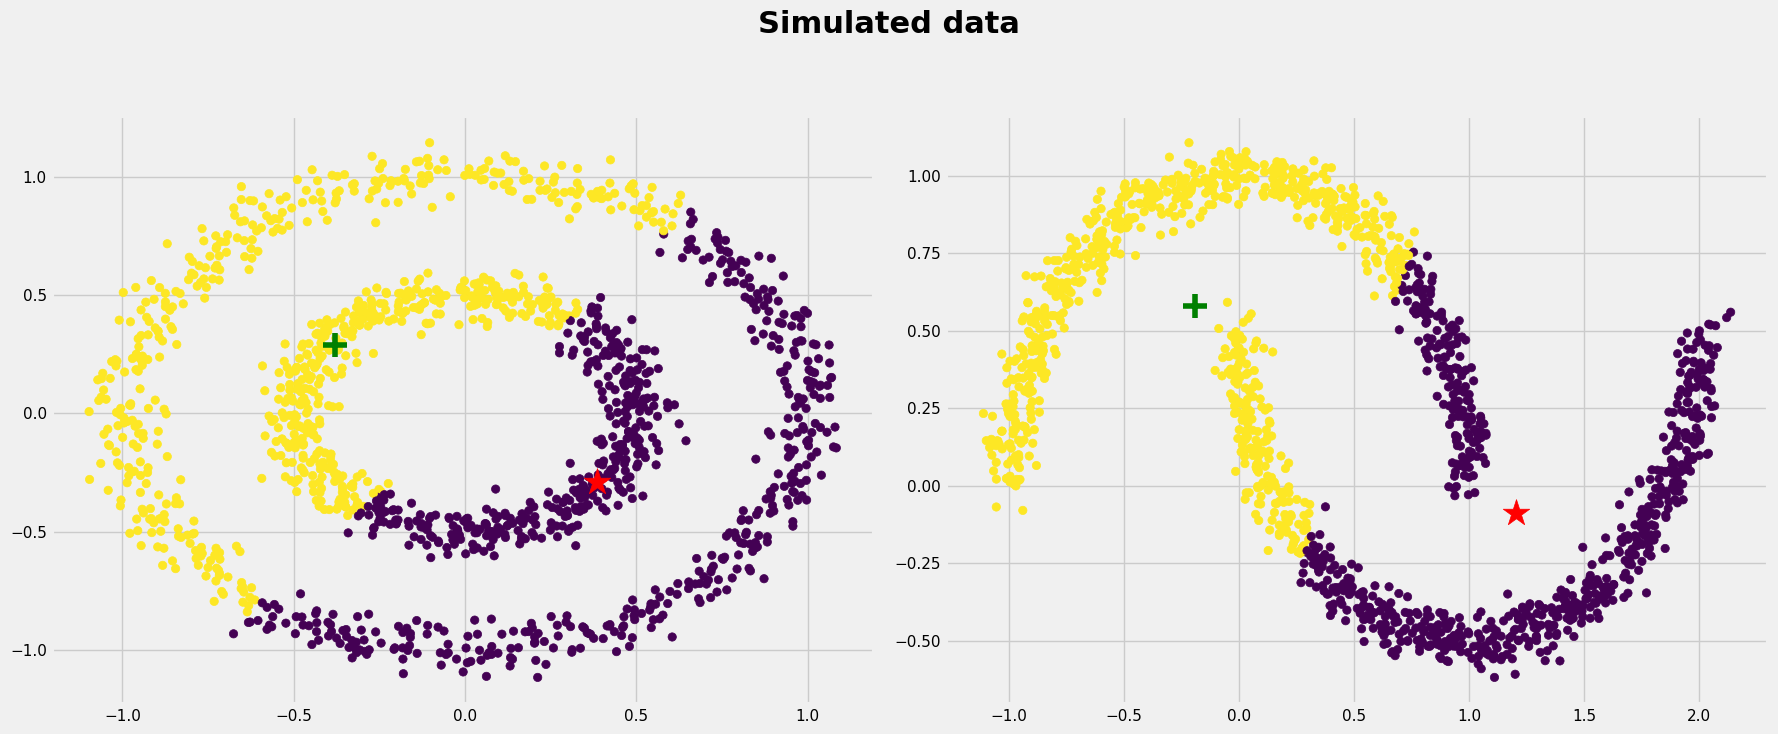

In [22]:


for i, k in enumerate([4, 5, 22]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    km = KMeans(n_clusters=2)
    km.fit(X[0])
    labels = km.predict(X[0])
    centroids = km.cluster_centers_

    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
    ax[i].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
    ax[i].scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='green')
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()